<a href="https://colab.research.google.com/github/IncrediblePenguinLovers/Keras-ML-/blob/main/https_www_tensorflow_org_tutorials_keras_classification%3Fhl%3Dko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

패션 MNIST 데이터셋 임포트하기

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

데이터 전처리

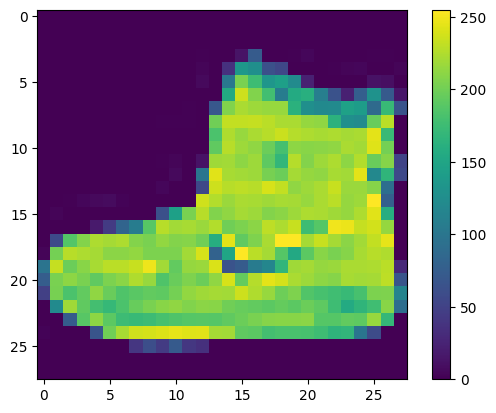

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

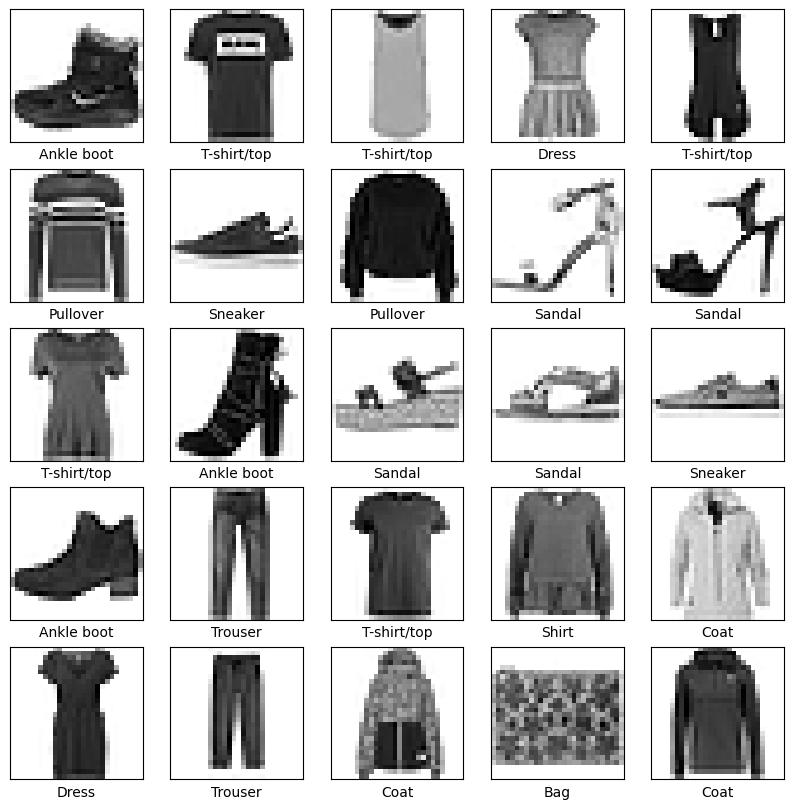

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

층 설정

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

모델 컴파일

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

모델 피드

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.1132 - accuracy: 0.6468
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6515 - accuracy: 0.7652
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5741 - accuracy: 0.7941
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5303 - accuracy: 0.8131
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5020 - accuracy: 0.8229
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4818 - accuracy: 0.8309
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4667 - accuracy: 0.8364
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4550 - accuracy: 0.8397
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4455 - accuracy: 0.8426
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.43

정확도 평가

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4707 - accuracy: 0.8272 - 466ms/epoch - 1ms/step

Test accuracy: 0.8271999955177307


예측하기

In [31]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [34]:
predictions[0]

array([4.5435141e-07, 4.0487055e-08, 6.2236622e-06, 4.5529246e-06,
       1.1276003e-05, 1.2926535e-01, 2.3622550e-05, 3.1804657e-01,
       7.1897381e-03, 5.4545218e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

예측 확인

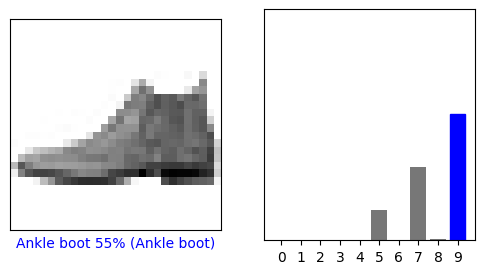

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

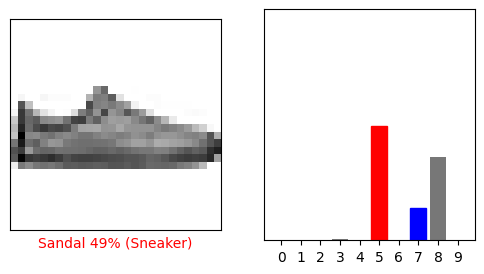

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

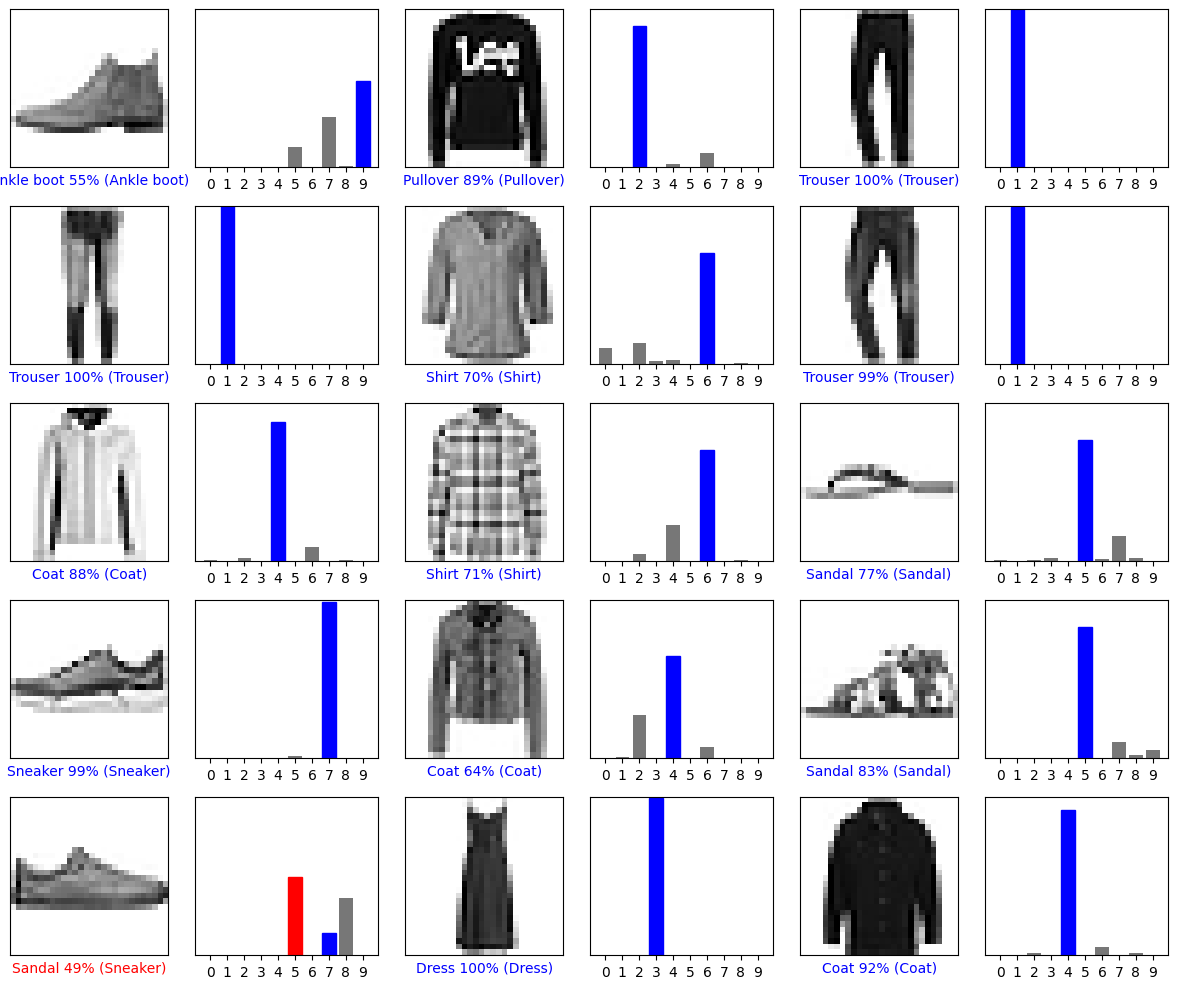

In [40]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

훈련된 모델 사용하기

In [41]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [42]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.94845081e-04 1.24787675e-06 8.94170523e-01 2.49737750e-05
  1.79934092e-02 1.19742133e-10 8.75009224e-02 1.47692701e-17
  1.14017435e-04 8.24164630e-13]]


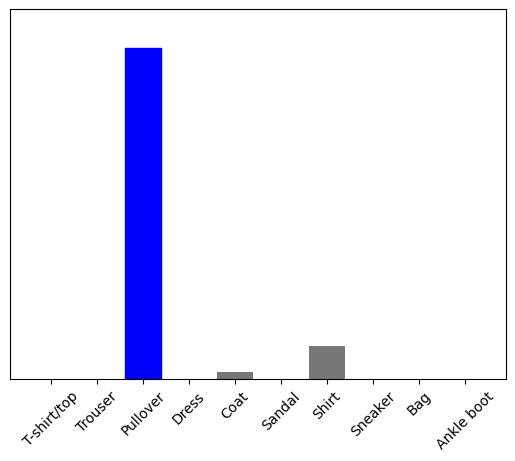

In [44]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [45]:
np.argmax(predictions_single[0])

2

In [46]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.